In [42]:
from Bio import SeqIO
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from itertools import product
import numpy as np
from sklearn.manifold import MDS
import warnings
warnings.filterwarnings("ignore")
import random
from bs4 import BeautifulSoup
import math
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [2]:
gene=[]
for seq_record in SeqIO.parse("HW2.fas", "fasta"):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))
    gene.append(repr(seq_record.seq))

AA20_unique_1b_43_1_26
Seq('CACCTACAGCTGCCCTAGTGGTGTCGCAGTTACTCCGGATCCCACAAGCTGTCG...TAA')
264
AA20_unique_1b_43_2_2
Seq('CACCTACAGCTGCCCTAGTGGTGTCGCAGTTACTCCGGATCCCACAAGCTGTCG...TAA')
264
AA20_unique_1b_43_3_1
Seq('CACCTACAGCTGCCCTAGTGGTGTCGCAGTTACTCCGGATCCCACAAGCTGTCG...TAA')
264
AA20_unique_1b_43_4_1
Seq('CACCTACAGCTGCCCTAGTGGTGTCGCGGTTACTCCGGATCCCACAAGCTGTCG...TAA')
264
AA20_unique_1b_43_5_1
Seq('CACCTACAGCTGCCCTAGTGGTGTCGCAGTTACTCCGGGTCCCACAAGCTGTCG...TAA')
264
AA20_unique_1b_43_7_1
Seq('CACCTACAGCTGCCCTAGTGGTGTCGCAGCTACTCCGGATCCCACAAGCTGTCG...TAA')
264
AA20_unique_1b_43_8_1
Seq('CACCTACAGCTGCCCTAGTGGTGTCGCAGTTACTCCGGATCCCACAAGTTGTCG...TAA')
264
AA20_unique_1b_43_9_1
Seq('CACCTACAGCTGCCCTAGTGGTGTCGCAGTTACTCCGGATCCCACAAGCTGTCG...TAA')
264
AA20_unique_1b_43_10_1
Seq('CACCTACAGCTGCCCTAGTGGTGTCGCAGTTACTCCGGATCCCACAAGCTGTCG...TAA')
264
AA20_unique_1b_43_11_1
Seq('CACCTACAGCTGCCCTAGTGGTGTCGCAGTTACTCCGGATCCCACAAGCTGTCG...TAA')
264
AA20_unique_1b_43_12_1
Seq('CACCTACAGCTGCCCTAGTGGTGTCGCAG

In [3]:
hamming_df = pd.DataFrame(gene, columns=["sequence"])

In [4]:
def hamming_dist(str1, str2):
    hamming = 0
    for letter in range(len(str1)):
        if str1[letter] != str2[letter]:
            hamming += 1
    return hamming

In [5]:
res = pd.DataFrame([hamming_dist(*p) for p in product(hamming_df["sequence"], repeat=2)], 
                   columns=["hamming_sequence"])

In [6]:
arr = res.values.reshape(120,120)
arr

array([[ 0,  0,  0, ..., 18, 18, 20],
       [ 0,  0,  0, ..., 18, 18, 20],
       [ 0,  0,  0, ..., 18, 18, 20],
       ...,
       [18, 18, 18, ...,  0,  0,  2],
       [18, 18, 18, ...,  0,  0,  2],
       [20, 20, 20, ...,  2,  2,  0]])

In [7]:
mds = MDS(n_components=2)
X_transform = mds.fit_transform(arr)
print(X_transform)

[[-69.03044358 -71.86631634]
 [-69.03157482 -71.86494986]
 [-69.03157635 -71.86494802]
 [-76.13248653 -69.47397924]
 [-76.06369279 -69.97453119]
 [-61.61578024 -63.79870181]
 [-76.30214692 -69.18517227]
 [-69.03155341 -71.86497573]
 [-69.03151197 -71.86502578]
 [-69.03153584 -71.86499696]
 [-69.03038525 -71.8663868 ]
 [-69.03158041 -71.86494312]
 [-69.03157378 -71.86495112]
 [-69.03073963 -71.86595874]
 [-76.21978122 -69.32831046]
 [-69.03058353 -71.8661473 ]
 [-55.99449541 -80.15810569]
 [-55.99465201 -80.15797526]
 [-55.99449142 -80.158109  ]
 [-55.99449666 -80.15810464]
 [-55.99448847 -80.15811147]
 [-55.99448923 -80.15811083]
 [-55.99450397 -80.15809856]
 [-55.99448806 -80.15811181]
 [-55.99448972 -80.15811042]
 [-55.99450691 -80.15809611]
 [-62.59566397 -79.50708654]
 [-55.99448255 -80.1581164 ]
 [-63.03987015 -78.95817633]
 [-55.99449017 -80.15811005]
 [-55.99449227 -80.15810829]
 [-54.93602945 -75.41197893]
 [-55.99448083 -80.15811783]
 [-64.25247727 -71.17611861]
 [-55.99448848

In [8]:
stress = mds.stress_
print(stress)

20782.92991281524


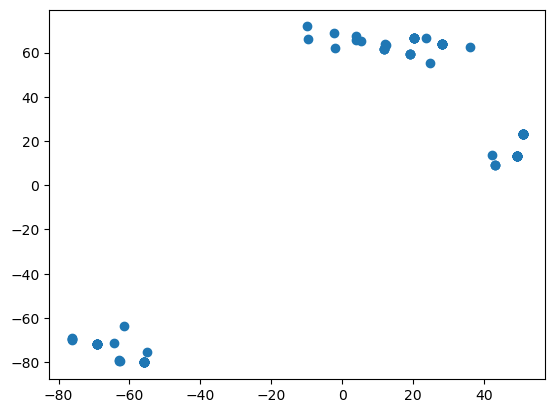

In [9]:
from matplotlib import pyplot as plt
plt.scatter(X_transform[:, 0], X_transform[:, 1])
plt.show()

In [10]:
k = 3
from sklearn.cluster import KMeans
km = KMeans(
       n_clusters=3, init='random',
       n_init=10, max_iter=300,
       random_state=20
       )
y_km = km.fit_predict(X_transform)

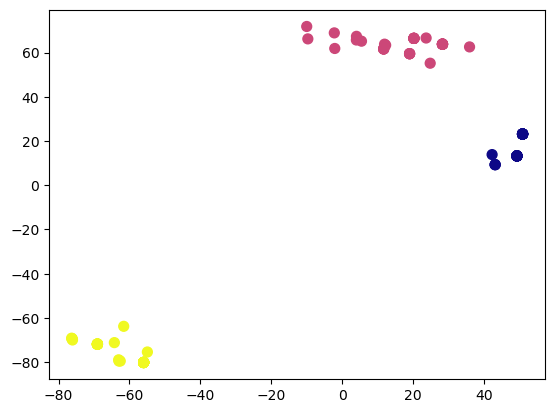

In [11]:

plt.scatter(X_transform[:, 0], X_transform[:, 1], c=y_km, s=50, cmap='plasma')

### K-Means implementation without sklearn


In [12]:
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLNE = '\033[4m'
    END = '\033[0m'

In [13]:
# Initialize Centroids for Clusters
def random_centroid(X,k):
    random_idx=[np.random.randint(len(X)) for i in range(k)]
    centroids = []
    for i in random_idx:
        centroids.append(X[i])
    return centroids

# Assign the data to corresponding cluster based on the centroids
def assign_cluster(X,ini_centroids,k):
    cluster = []
    for i in range(len(X)):
        euc_dist=[]
        
        for j in range(k):
            euc_dist.append(np.linalg.norm(np.subtract(X[i], ini_centroids[j])))
        idx = np.argmin(euc_dist)
        cluster.append(idx)
    return np.asarray(cluster)

# update centroids
def compute_centroid(X,clusters,k):
    centroid = []
    for i in range(k):
        temp_arr = []
        for j in range(len(X)):
            if clusters[j]==i:
                temp_arr.append(X[j])
        
        centroid.append(np.mean(temp_arr, axis=0))
    return np.asarray(centroid)

# Know the difference: previous centroid to the current centroid

def difference(prev,nxt):
    diff=0
    for i in range(len(prev)):
        diff+=np.linalg.norm(prev[i]-nxt[i])
    return diff

# Plotting the data points
def show_clusters(X,clusters,centroids,ini_centroids,mark_centroid=True,show_ini_centroid=True,show_plots=True):
    #assigning specific color to each cluster. Assuming 3 for now
    cols={0:'r',1:'b',2:'g',3:'coral',4:'c',5:'lime'}
    fig,ax=plt.subplots(figsize=(7.5,6));
    #plots every cluster points
    for i in range(len(clusters)):
        ax.scatter(X[i][0],X[i][1],color=cols[clusters[i]])
    #plots all the centroids
    for j in range(len(centroids)):
        ax.scatter(centroids[j][0],centroids[j][1],marker='*',color=cols[j])
        if show_ini_centroid==True:
            ax.scatter(ini_centroids[j][0],ini_centroids[j][1],marker="+",s=150,color=cols[j])
    #used to mark the centroid by drawing a circle around it
    if mark_centroid==True:
        for i in range(len(centroids)):
            ax.add_artist(plt.Circle((centroids[i][0],centroids[i][1]),0.4,linewidth=2,fill=False))
            if show_ini_centroid==True:
                ax.add_artist(plt.Circle((ini_centroids[i][0],ini_centroids[i][1]),0.4,linewidth=2,color='y',fill=False))
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_title("K-means Clustering")
    if show_plots==True:
        plt.show()
        

# K-Means

#Used to perform k means clustering
#if show type input is not given then it will show plot for each loop
def k_means(X,k,show_type='all',show_plots=True):
    c_prev=random_centroid(X,k)#initially assign a random centroid
    cluster=assign_cluster(X,c_prev,k) #to store the cluster number of the data point
    diff = 100 #assuming that the initial difference between the centroids is 100
    ini_centroid = c_prev; #storing the initial centroid values
    
    print(color.BOLD+"NOTE:\n + and Yellow Circle -> Initial Centroid\n * andBlack Circle -> Final Centroid"+color.END)
    
    #stops if the difference is less than 0.001
    if show_plots:
        print(color.BOLD+"\n\nInitial Plot:\n"+color.END)
        show_clusters(X,cluster,c_prev,ini_centroid,show_plots=show_plots)
    while diff>0.0001:
        cluster = assign_cluster(X,c_prev,k) #assigns the data point to respective clusters
        #plotting the initial graph
        if show_type=='all' and show_plots:
            show_clusters(X,cluster,c_prev,ini_centroid,False,False,show_plots=show_plots)
            mark_centroid=False #Not to mark the centroids for other plots
            show_ini_centroid=False #Not to mark the initail centroid for all
        c_new = compute_centroid(X,cluster,k) # to compute the new centroid point
        diff = difference(c_prev,c_new) #to compute the difference between the centroids
        c_prev=c_new # now new centroid becomes current centroid point
    
    #Final cluster centers
    if show_plots:
        print(color.BOLD+"\nInitial Cluster Centers:\n"+color.END)
        print(ini_centroid)
        print(color.BOLD+"\nFinal Cluster Centers:\n"+color.END)
        print(c_prev)
        #Plotting the final plot
        print(color.BOLD+"\n\nFinal Plot:\n"+color.END) 
        show_clusters(X,cluster,c_prev,ini_centroid,mark_centroid=True,show_ini_centroid=True)    
    return cluster,c_prev
        


NOTE:
 + and Yellow Circle -> Initial Centroid
 * andBlack Circle -> Final Centroid


Initial Plot:



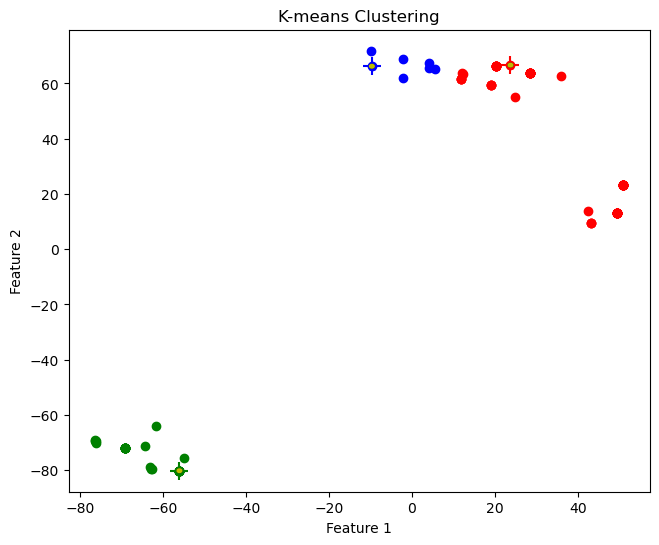


Initial Cluster Centers:

[array([23.69375957, 66.61888146]), array([-9.67217191, 66.22543253]), array([-55.99448972, -80.15811042])]

Final Cluster Centers:

[[ 49.42912759  17.80849102]
 [ 17.81111541  64.03461012]
 [-62.43736851 -75.99716535]]


Final Plot:



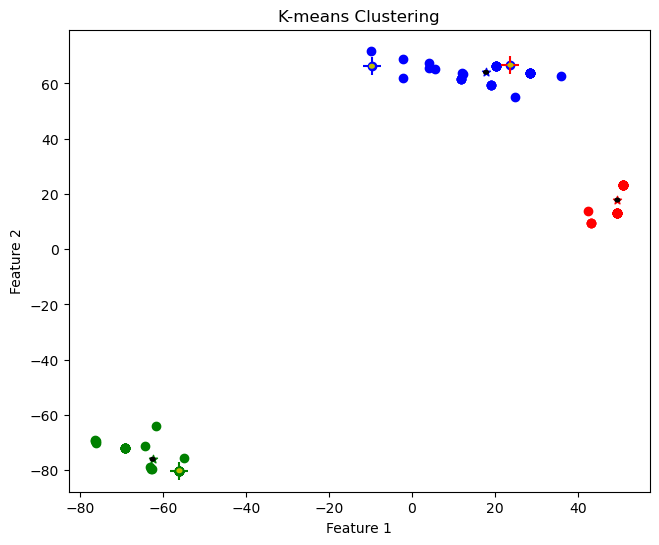

(array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 array([[ 49.42912759,  17.80849102],
        [ 17.81111541,  64.03461012],
        [-62.43736851, -75.99716535]]))

In [14]:
k = 3
k_means(X_transform, k, show_type='ini_fin')

### Q2

### Percentage of persons over the age of 65 in the population

In [26]:
wikiurl= "https://en.wikipedia.org/wiki/List_of_countries_by_age_structure"
response=requests.get(wikiurl)
soup = BeautifulSoup(response.text, 'html.parser')
table= soup.find('table', {'class': "wikitable"})

In [27]:
age_65 = pd.read_html(str(table))
age_65 = pd.DataFrame(age_65[0])
age_65.columns = age_65.columns.droplevel()
age_65 = age_65[['Country','Over 65']]

### hospital beds per 1000 people

In [28]:
beds = pd.read_csv("API_SH.MED.BEDS.ZS_DS2_en_csv_v2_4522414.csv",skiprows=4, index_col='Country Name')
beds = beds.iloc[:,np.r_[3:65]]
years = beds.T.apply(pd.Series.last_valid_index, ).to_list()

In [29]:
def f(x):
    if x.last_valid_index() is None:
        return np.nan
    else:
        value = round(x[x.last_valid_index()],1) 
        return value

beds['hospital_beds'] = beds.apply(f, axis=1)
beds['year'] = years
beds = beds[['year','hospital_beds']].reset_index()
df_X = pd.merge(age_65, beds, left_on='Country', 
                right_on='Country Name', how='inner').drop('Country Name', axis=1)

### deaths per 100k population

In [30]:
df_y = pd.read_excel("death_100k.xlsx")

### Final dataframe

In [31]:
df = pd.merge(df_X, df_y, left_on='Country', right_on='Country', how='inner')
df['Over 65'] = df['Over 65'].str.rstrip('%').astype('float')
df.head()

,Country,Over 65,year,hospital_beds,death_100k
0,Afghanistan,2.68,2017,0.4,20.05
1,Albania,13.03,2013,2.9,124.71
2,Algeria,6.17,2015,1.9,15.69
3,Angola,2.30,2005,0.8,5.83
4,Antigua and Barbuda,8.91,2017,2.9,149.09


In [32]:
df = df.dropna()
df.reset_index(inplace=True)






In [33]:
X = df.iloc[:,np.r_[2,4]]
Y = df['death_100k']

In [34]:
stats = X[::]
stats['death_100k'] = Y

<AxesSubplot:>

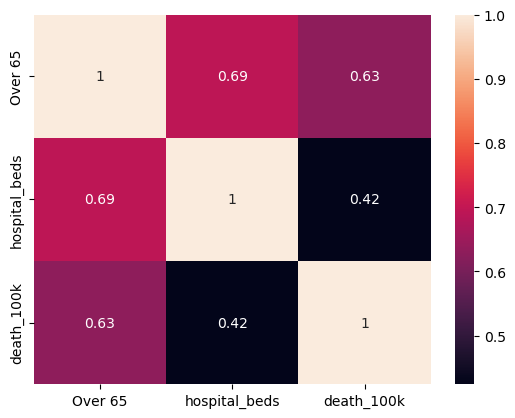

In [35]:
corr = stats.corr()
sns.heatmap(corr, annot=True)

In [36]:
corr

,Over 65,hospital_beds,death_100k
Over 65,1.000000,0.692955,0.629632
hospital_beds,0.692955,1.000000,0.424641
death_100k,0.629632,0.424641,1.000000


**Based on the above correlation we can clearly see that people over age of 65 and hospital_beds have good correlation with death_100k**

Text(0, 0.5, 'Deaths')

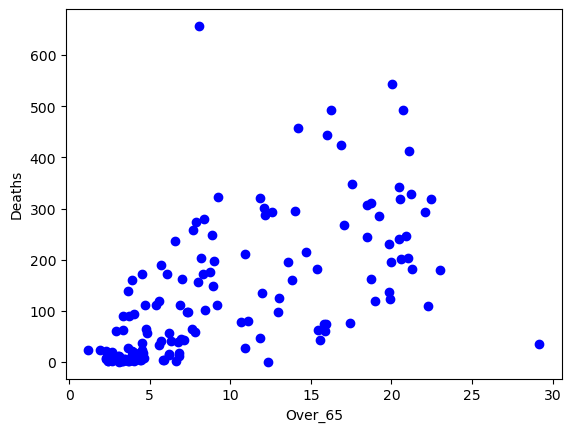

In [37]:
plt.scatter(X["Over 65"], Y, c ="blue")
plt.xlabel("Over_65")
plt.ylabel("Deaths")

**Above graph clearly presents when Over 65 percentage is less, no of deaths per 100K in that country is also less**

Text(0, 0.5, 'Deaths')

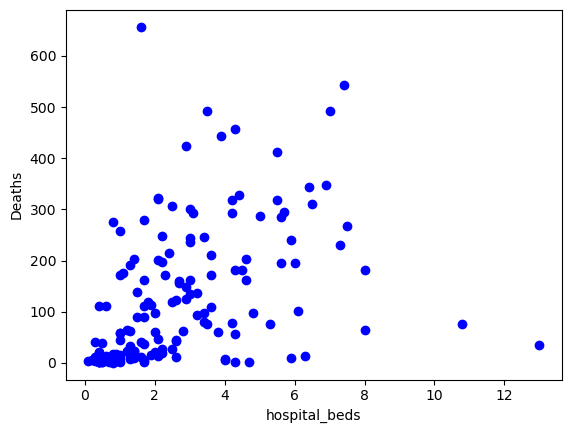

In [38]:
plt.scatter(X["hospital_beds"], Y, c ="blue")
plt.xlabel("hospital_beds")
plt.ylabel("Deaths")

### Apply 5-Fold cross validation and linear regression

In [39]:
k = 5
kf = KFold(n_splits=k, random_state=None)
model = LinearRegression()
rmse_score = []
f_true = []
f_pred = []
i = 1

In [40]:
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = Y[train_index] , Y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
    
    rmse = mean_squared_error(y_test, pred_values, squared=False)
    print(f"rmse over {i} fold: ", rmse)
    rmse_score.append(rmse)
    if i == 5:
        f_true.append(y_test.values)
        f_pred.append(pred_values)
    i+=1

rmse over 1 fold:  112.34089669138025
rmse over 2 fold:  92.78775005109641
rmse over 3 fold:  105.54676395281228
rmse over 4 fold:  135.34892663178152
rmse over 5 fold:  71.86023815792267


In [43]:
MSE = mean_squared_error(y_test, pred_values)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

71.86023815792267
